# Clustering Weather Forecast Data

In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

# Load and Check the Dataset

In [2]:
# Load the original dataset
weather_df = pd.read_csv(
    Path("./resources/weather_forecast_data.csv")
)

weather_df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [3]:
# Check the data
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


# Standardize the Data

In [4]:
# Normalize the data, scaling selected columns to a mean of 0 and a standard deviation of 1 
weather_df_scaled = StandardScaler().fit_transform(weather_df[["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]])
weather_df_scaled = pd.DataFrame(data = weather_df_scaled, columns = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"])
weather_df_scaled

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,0.155431,1.265393,-0.444814,0.028972,0.894714
1,0.723225,-0.895074,-0.684143,-1.534074,-1.074570
2,0.339547,0.938599,-1.476731,-1.195246,-0.350663
3,0.142018,0.502270,-0.494138,0.604355,-1.568924
4,-0.271701,1.629599,-0.910571,-0.068058,-1.658406
...,...,...,...,...,...
2495,-0.107859,-0.956164,0.328930,0.184996,0.167085
2496,0.679371,-0.895473,0.169343,-0.341480,-0.283343
2497,0.754423,-1.029030,-1.212828,0.899289,-0.752419
2498,-1.063739,-0.322744,-1.303224,-1.623756,1.594142


In [5]:
# Convert categorical variable into dummy/indicator variables.
dummies_df = pd.get_dummies(weather_df["Rain"])

# Concatenate "weather_df_scaled" data and "dummies_df" data
weather_df_converted = pd.concat([weather_df_scaled, dummies_df], axis = 1)
weather_df_converted.to_csv(Path("./exported_resources/weather_df_scaled.csv", header = True))
weather_df_converted

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,no rain,rain
0,0.155431,1.265393,-0.444814,0.028972,0.894714,False,True
1,0.723225,-0.895074,-0.684143,-1.534074,-1.074570,True,False
2,0.339547,0.938599,-1.476731,-1.195246,-0.350663,True,False
3,0.142018,0.502270,-0.494138,0.604355,-1.568924,False,True
4,-0.271701,1.629599,-0.910571,-0.068058,-1.658406,True,False
...,...,...,...,...,...,...,...
2495,-0.107859,-0.956164,0.328930,0.184996,0.167085,True,False
2496,0.679371,-0.895473,0.169343,-0.341480,-0.283343,True,False
2497,0.754423,-1.029030,-1.212828,0.899289,-0.752419,True,False
2498,-1.063739,-0.322744,-1.303224,-1.623756,1.594142,True,False


In [6]:
# Check the data
weather_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   no rain      2500 non-null   bool   
 6   rain         2500 non-null   bool   
dtypes: bool(2), float64(5)
memory usage: 102.7 KB


# Reducing the Dimensionality of Data Using PCA (Principal Component Analysis)

In [7]:
# Reducing the Dimensionality of Data Using PCA
pca = PCA(n_components = 4)
weather_pca_df = pca.fit_transform(weather_df_converted)
weather_pca_df = pd.DataFrame(data = weather_pca_df, columns = ["PCA_1", "PCA_2", "PCA_3", "PCA_4"])
weather_pca_df

,PCA_1,PCA_2,PCA_3,PCA_4
0,1.100281,0.122841,0.289589,0.028631
1,-1.692809,-1.495969,-0.008141,0.248728
2,-0.168102,-1.657428,0.323389,0.611214
3,1.008710,-1.184610,0.856582,-0.173474
4,1.228191,-2.098748,0.415566,0.050757
...,...,...,...,...
2495,-0.568782,0.646697,-0.141785,0.122093
2496,-1.116730,-0.063102,0.133648,-0.288728
2497,-0.665798,-0.239096,1.708415,0.539462
2498,-0.716187,0.162482,-0.991076,2.060657


In [8]:
# Check the reduced 2 principal components variance ratio
variance_ratio = sum(pca.explained_variance_ratio_) * 100
print(f"The 7 original features were reduced to 4 principal components, capturing approximately {round(variance_ratio, 2)}% of total variance.")

The 7 original features were reduced to 4 principal components, capturing approximately 79.19% of total variance.


# Determining the Number of Clusters

In [9]:
import warnings

warnings.filterwarnings("ignore")

# Determine the number of clusters using elbow method
inertia = []
cluster_list = list(range(1, 21))

for clusters in cluster_list:
    k_model = KMeans(n_clusters = clusters, random_state = 1)
    k_model.fit(weather_pca_df)
    inertia.append(k_model.inertia_)

elbow = {
    "cluster_num": cluster_list,
    "inertia": inertia
}

# Visualize elbow method
elbow_df = pd.DataFrame(data = elbow)

elbow_df.hvplot.line(
    x = "cluster_num",
    y = "inertia",
    title = "Elbow Method",
    xticks = cluster_list,
    alpha = 0.7,
    color = 'red'
)

:Curve   [cluster_num]   (inertia)

In [10]:
print("Since the optimal number of clusters is not clearly identifiable, I will rely on the Calinski-Harabasz score for determination.")

Since the optimal number of clusters is not clearly identifiable, I will rely on the Calinski-Harabasz score for determination.


In [11]:
# Determine the number of clusters using Calinski-Harabasz score
scores = []
cluster_list = list(range(2, 31))

for clusters in cluster_list:
    k_model = KMeans(n_clusters = clusters, random_state = 1)
    k_model.fit(weather_pca_df)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(weather_pca_df, labels)
    scores.append(score)

cluster_scores = {
    "cluster_num": cluster_list,
    "Calinski Harabasz Score": scores
}

# Make a dataframe of Calinski Harabasz Score
scores_df = pd.DataFrame(data = cluster_scores)
scores_df

,cluster_num,Calinski Harabasz Score
0,2,571.193426
1,3,537.350576
2,4,543.473470
3,5,553.786176
4,6,538.222831
5,7,532.539746
6,8,537.004893
7,9,517.193428
8,10,505.626653
9,11,498.862764


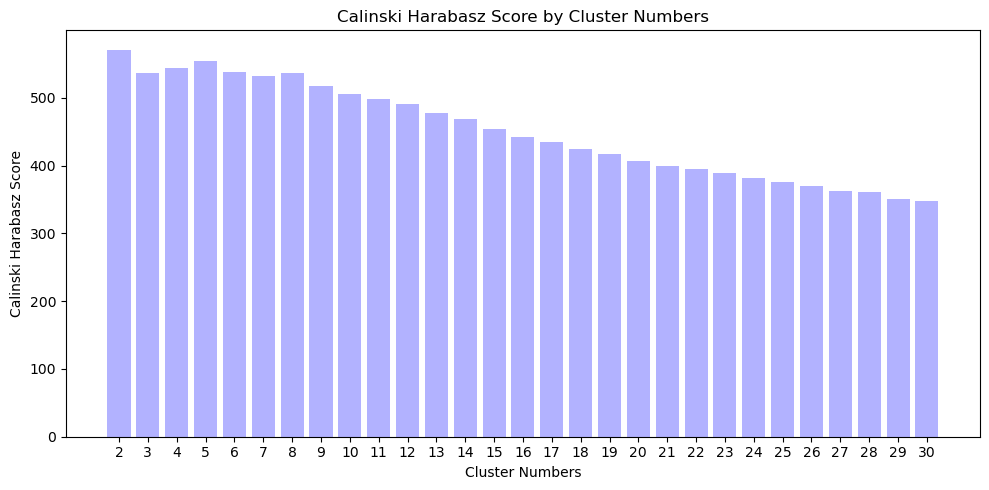

In [12]:
# Visualize the Calinski-Harabasz score
plt.figure(figsize = (10, 5))
plt.bar(scores_df["cluster_num"], scores_df["Calinski Harabasz Score"], color = 'blue', alpha = 0.3)
plt.xticks(cluster_list)
plt.title("Calinski Harabasz Score by Cluster Numbers")
plt.xlabel("Cluster Numbers")
plt.ylabel("Calinski Harabasz Score")
plt.tight_layout()

plt.show()

The highest score of clusters appears to be 2, however, we aim to achieve more detailed results; therefore, we have decided to adopt 5 clusters, as it represents the point where the score begins to decline after increasing, while remaining close to the highest score.

# Segment the Data Using the K-means Algorithm

In [13]:
# Segment the Data Using the K-means Algorithm
k_model = KMeans(n_clusters = 5, random_state = 1)
k_model.fit(weather_pca_df)
cluster = k_model.predict(weather_pca_df)

# Create cluster dataframe
cluster_df = pd.DataFrame(data = cluster, columns = ["Cluster"])
cluster_df.to_csv(Path("./exported_resources/weather_cluster_label_df.csv"), header = True)
cluster_df

,Cluster
0,1
1,3
2,3
3,3
4,3
...,...
2495,0
2496,0
2497,3
2498,4


In [14]:
# Concatenate the "weather_pca_df" dataframe and "cluster_df" dataframe
pca_clustered_df = pd.concat([weather_pca_df, cluster_df], axis = 1)
pca_clustered_df

,PCA_1,PCA_2,PCA_3,PCA_4,Cluster
0,1.100281,0.122841,0.289589,0.028631,1
1,-1.692809,-1.495969,-0.008141,0.248728,3
2,-0.168102,-1.657428,0.323389,0.611214,3
3,1.008710,-1.184610,0.856582,-0.173474,3
4,1.228191,-2.098748,0.415566,0.050757,3
...,...,...,...,...,...
2495,-0.568782,0.646697,-0.141785,0.122093,0
2496,-1.116730,-0.063102,0.133648,-0.288728,0
2497,-0.665798,-0.239096,1.708415,0.539462,3
2498,-0.716187,0.162482,-0.991076,2.060657,4


In [15]:
# Concatenate the "weather_df_converted" (scaled data) dataframe and "cluster_df" dataframe
weather_df_scaled_clustered = pd.concat([weather_df_converted, cluster_df], axis = 1)
weather_df_scaled_clustered

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,no rain,rain,Cluster
0,0.155431,1.265393,-0.444814,0.028972,0.894714,False,True,1
1,0.723225,-0.895074,-0.684143,-1.534074,-1.074570,True,False,3
2,0.339547,0.938599,-1.476731,-1.195246,-0.350663,True,False,3
3,0.142018,0.502270,-0.494138,0.604355,-1.568924,False,True,3
4,-0.271701,1.629599,-0.910571,-0.068058,-1.658406,True,False,3
...,...,...,...,...,...,...,...,...
2495,-0.107859,-0.956164,0.328930,0.184996,0.167085,True,False,0
2496,0.679371,-0.895473,0.169343,-0.341480,-0.283343,True,False,0
2497,0.754423,-1.029030,-1.212828,0.899289,-0.752419,True,False,3
2498,-1.063739,-0.322744,-1.303224,-1.623756,1.594142,True,False,4


In [17]:
# Check the dataframe
weather_df_scaled_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   no rain      2500 non-null   bool   
 6   rain         2500 non-null   bool   
 7   Cluster      2500 non-null   int32  
dtypes: bool(2), float64(5), int32(1)
memory usage: 112.4 KB
